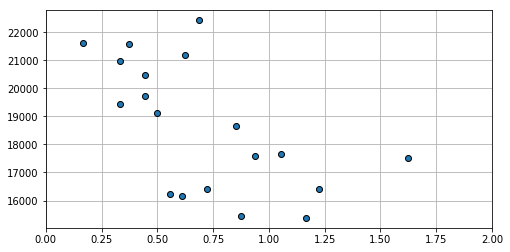

C:\Users\kouta\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


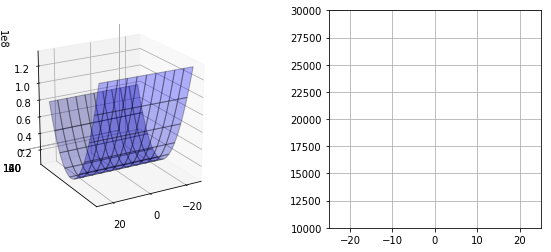

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#X = [9/16, 1/16, 1/16, 4/16, 5/16, 6/16, 3/18, 6/18, 1/18, 1/18,\
#     1/18, 4/18, 6/18, 11/18, 5/18, 3/18, 5/18, 1/18, 2/18, 3/18]
#Y = [17049, 17507, 22425, 21590, 21204, 17585, 18641, 15433, 16239, 19714,\
#     21617, 20966, 16156, 15381, 16419, 17665, 16423, 19103, 20467, 19434]

X_min = 0
X_max = 2
X_n = 19

X_2 = np.array([1, 9/16, 1/16, 1/16, 4/16, 5/16, 6/16, 3/18, 6/18, 1/18, 1/18,\
       1/18, 4/18, 6/18, 11/18, 5/18, 3/18, 5/18, 1/18])
X_1 = np.array([9/16, 1/16, 1/16, 4/16, 5/16, 6/16, 3/18, 6/18, 1/18, 1/18,\
       1/18, 4/18, 6/18, 11/18, 5/18, 3/18, 5/18, 1/18, 2/18])
X_0 = np.array([1/16, 1/16, 4/16, 5/16, 6/16, 3/18, 6/18, 1/18, 1/18,\
       1/18, 4/18, 6/18, 11/18, 5/18, 3/18, 5/18, 1/18, 2/18, 3/18])
X = X_2 + X_1 + X_0

T = [17507, 22425, 21590, 21204, 17585, 18641, 15433, 16239, 19714,\
     21617, 20966, 16156, 15381, 16419, 17665, 16423, 19103, 20467, 19434]

plt.figure(figsize=(8, 4))
plt.plot(X, T, linestyle="none", marker="o", markeredgecolor="k")
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

# リスト 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

xn = 100
w0_range = [-25, 25]
w1_range = [10000, 30000]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, 60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()
